# WholeSlideImageSampler demo

This respository aims to develop a tool for sampling from Whole-Slide-Images (WSIs) in an efficient manner. By sampling we mean producing batches of patches which can then be fed to e.g. machine learning algorithms. This should ideally be achieved without storing all the patches on disk (waste of storage). It aims to work with all WSIs that can be read by [openslide](https://github.com/openslide/openslide-python). Sample data is available [here](https://www.dropbox.com/sh/hk676r960zxbqcb/AADrnhTuKRH296GTFwdqWKxca?dl=0).

## Assumptions

- You have WSIs in a format readable by openslide.
- You may also have multi-resolution-image annotation files, such as those exportable by the slide annotation tool [ASAP](https://github.com/computationalpathologygroup/ASAP) (which supports all openslide readable images). For example, see the folder 'annotation' in the sample data. The annotations can be multi-class.

In [1]:
from wsisampler import OpenSlidePlus
from wsisampler.annotation import Annotation
from wsisampler.tissuemask import TissueMask
from wsisampler.misc import save_patchframe_patches

from wsisampler import Sampler

import numpy as np
import matplotlib.pyplot as plt
import glob
import os
%matplotlib inline

In [2]:
def show_PIL(pil_im, size=5):
    '''A function to show PIL images in the notebook.'''
    plt.figure(figsize=(size,size))
    plt.imshow(np.asarray(pil_im),cmap='gray')

# Load sample data

In [3]:
# Where is the data?
mac = False
if mac:
    data_dir = '/Users/peterb/Dropbox/SharedMore/WSI_sampler'
else:
    data_dir = '/home/peter/Dropbox/SharedMore/WSI_sampler'

tumor = True
file = os.path.join(data_dir,'Tumor_108.tif') if tumor else os.path.join(data_dir,'Normal_106.tif')

tissue_mask_dir = './tissue_masks'
annotation_dir = os.path.join(data_dir, 'annotation')

tumor_annotation = os.path.join(annotation_dir,'Tumor_108_mask.tif')

# View the slide

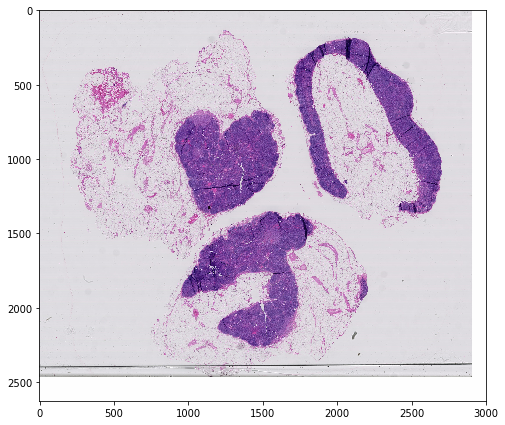

In [4]:
slide = OpenSlidePlus(file, level0=40)
thumb = slide.get_thumbnail(size=(3000,3000))
show_PIL(thumb, size=8)

# View the generated tissue mask

Tissue mask not found. Generating now.
Pickling TissueMask to ./tissue_masks/Tumor_108_TissueMask.pickle


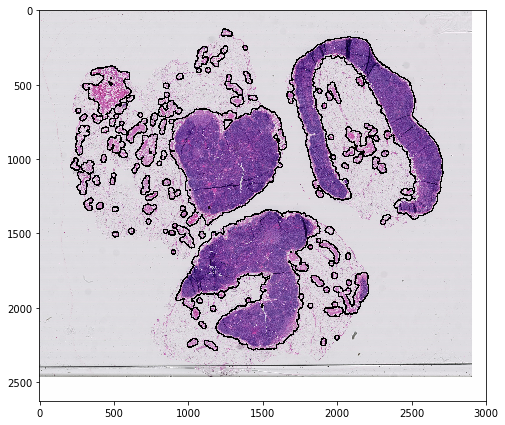

In [5]:
tissue_mask = TissueMask(tissue_mask_dir, reference_wsi=slide)
vis = tissue_mask.visualize(reference_wsi=slide)
show_PIL(vis, size=8)

# Look at a patch

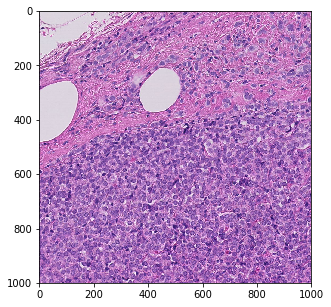

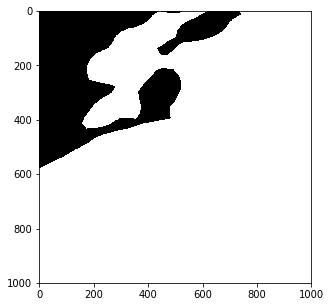

In [6]:
patch = slide.get_patch(w=45000, h=30000, mag=20, size=1000)
show_PIL(patch)

if tumor:
    annotation = Annotation(tumor_annotation, reference_wsi=slide)
    patch = annotation.get_patch(w_ref=45000, h_ref=30000, mag=20, size=1000)
    show_PIL(patch)

# Sample patches

In [7]:
sampler = Sampler(file, level0=40, tissue_mask_dir=tissue_mask_dir, annotation_dir=annotation_dir)
sampler.prepare_sampling(magnification=20, patchsize=200)

Tissue mask found. Loading.
Annotation mask found. Loading.


In [8]:
patchframe = sampler.sample_patches(max_per_class=20, savedir=os.getcwd())

Rejected 14 patches for file Tumor_108
Saving patchframe to /home/peter/Dropbox/Projects/WholeSlideImageSampler/Tumor_108_patchframe.pickle


In [9]:
save_patchframe_patches(patchframe, './patches') # look in this directory

Saving hard copies of patches in patchframe to ./patches.
